## Project Concepts of Data Science

### Professor: Geert Jan BEX

### Authors: Eleftherios Kokkinis (2262635) -  Entzi Rakipi (2159531)

1. [Introduction](#Introduction)
    1. [Definition of a Ternary Search Tree](#Definition_of_a_Ternary_Search_Tree)
    2. [Brief description of the algorithm](#Brief_description_of_the_algorithm)
    3. [Advantages of TSTs](#advantages_of_TSTs)
  
    
2. [Complexity Analysis of TST](#Complexity_analysis_of_the_operations)
    1. [Time complexity of traversing the trie](#Trie_complexity)
    2. [Time complexity of traversing the BSTs in a TST](#BST_complexity)
    3. [Balanced BSTs in a TST](#Balanced_BSTs)
    4. [Unbalanced BSTs in a TST](#Unbalanced_BSTs)
    5. [Best and Worst case scenarios](#Best_and_Worst_case)
    6. [Time complexity for a Search miss](#Search_miss)
    7. [Time complexity of all_strings()](#all_strings)

3. [Implementation](#Implementation)
    1. [Python class definition for the TST](#Python_class_definition_for_the_TST)
    2. [Documentation](#Documentation)
    4. [Example Usage](#Example_Usage)
    
4. [Testing](#Testing)
    
    
5. [Empirical Performance](#Discussion)
    1. [Time Complexity for Search & Insert - Small unordered dataset](#Discussion_on_the_expected_complexity)
    2. [Discussion of the Empirical and Theoretical Expectations](#Comparison_of_the_implementation_with_the_theoretical_expectations)
    3. [Generating a large dataset for Benchmarking](#Generation_of_a_larger_dataset)
    4. [Conclusions - Comparison of results - Potential improvements](#Conclusions)
    5. [Time Complexity for Sorted and Reverse Sorted data](#rev-sorted)
    6. [Comparisons - Conclusions](#conclusions)
    6. [Time Complexity of all_strings()](#all_strings())

6. [References](#references)

## Introduction <a name="Introduction"></a>

The goal of this project is to implement a Ternary Search Tree (TST) in Python, with operations for insertion, searching, and retrieving all strings. We will also analyze the time complexity of these operations and benchmark the implementation to verify its performance characteristics. In the end, this project should be able to provide an understanding of TSTs and their performance characteristics, as well as a working implementation of a TST in Python.

### Definition of a Ternary Search Tree <a name="Definition_of_a_Ternary_Search_Tree"></a>

A Ternary Search Tree (TST) is a special type of trie data structure where nodes are arranged in a manner similar to a binary search tree, but with up to three children rather than the binary tree's limit of two. Each node has a character, three links and a value. The three links correspond to keys whose current characters are less than, equal to, or greater than the node’s character ([Sedgewick and Wayne, 2011](#references)).

## Brief description of the algorithm <a name="Brief_description_of_the_algorithm"></a>

To search and insert we first compare the first character in the key with the character at the root. If it less, we take the left link; if it is greater, we take the right link; and if it is equal, we take the middle link and move to the next search key character. In each case, we apply the algorithm recursively. We terminate with a search miss if we encounter a null link or if the node where the search ends has a null value, and we terminate with a search hit if the node where the search ends has a non-null value.


.A ternary search tree takes the advantages of binary search trees and tries. That means it combines the memory efficiency of BSTs and the time efficiency of tries. ([Karumanchi, N., 2016](#references))


To insert a new key, we search, then add new nodes for the characters in the tail of the key. We use the characters of the key to guide us down the TST until reaching the last character of the key or a null link. At this point, one of the following two conditions holds:

1) We encountered a null link before reaching the last character of the key. In this
case, there is no trie node corresponding to the last character in the key, so we
need to create nodes for each of the characters in the key not yet encountered
and set the value in the last one to the value to be associated with the key.


2) We encountered the last character of the key before reaching a null link. In this
case, we set that node’s value to the value to be associated with the key (whether
or not that value is null), as usual with our associative array convention.

## Complexity analysis<a name="Complexity_analysis_of_the_operations"></a>

Let's define:

N = number of keys in the TST \
L = length of the key \
R = alphabet size (26 for the English alphabet) 

**Search and Insert Cost**: The cost of a search hit operation (searching for a key that exists or inserting a key) in a TST is determined by two factors: the cost of traversing the trie structure (which is proportional to the length of the key, L) and the cost of traversing the Binary Search Tree representation of each trie node.

Both the search and insert operatiosn in a TST have similar cost for a search hit. That's because in order to insert a key we need to find the position where the key should be inserted, which involves traversing the TST in the same way as a search operation. Once we find the position, we insert the key, which takes constant time.

#### Time complexity of traversing the trie<a name="Trie_complexity"></a>

Specifically about traversing the trie structure, in a TST, each node contains a character of a key. As we described previously when we're searching for a key, we start at the root of the TST and compare the first character of our key with the character at the current node. If they match, we move to the middle child and proceed to the next character in our key or we move to the left/right child. This process continues until we've either found our key or reached a null link.

The cost of this traversal is proportional to the length of the key, L, because we need to make a comparison for each character in the key. We represent this time complexity as O(L).

Although the time complexity O(L) represents the number of character comparisons in the key itself, it doesn't account for the comparisons that we need to do to navigate the tree structure.

#### Time complexity of traversing the BSTs in a TST<a name="BST_complexity"></a>

Now, each node in a TST also acts like a Binary Search Tree for the characters of the keys. So, when we're at a node and we want to move to the child that corresponds to the next character in our key, we need to traverse this BST. The cost of this traversal depends on how well balanced the TST (all the BSTs) is.

#### Time Complexity for a Balanced  TST ( balanced BSTs) <a name="Balanced_BSTs"></a>

In a balanced BST, the number of nodes doubles with each additional level of the tree, so the height of the tree (and therefore the maximum number of nodes that we need to examine in a search operation) is logarithmic in the number of keys N. Thus, the search cost in a BST is O(${\log N}$).

Therefore, when dealing with one key at a time, the comparison takes on average $O(log N)$ time when the tree is balanced and we may have to make up to L comparisons for a key of length L. 

So the total expected time complexity for searching or inserting a single key is O($L* log N$), where L is the length of the key and N is the number of keys in the tree.

However, when testing our TST implementation with multiple keys, we're essentially testing an operation that scales with N (the number of keys) and each operation is $O(L log N)$. Therefore we are having a combined time complexity of $O(N * L * logN$).

When speaking about time complexity we want to know the scaling effect. In the case where all keys have the same length, then L is constant for all differet Ns and thus irrelevant to the time complexity. In the case where our keys have varying lengths then we could consider L as the average length of all keys, and hence again a constant.

**All in all, when inserting/searching multiple keys in our TST, we can expect a time complexity of $O(N logN)$, which is linearithmic.**

#### Time complexity for an Unbalanced TST (unbalanced BSTs) <a name="Unbalanced_BSTs"></a>

On the other hand, if the keys are not randomly inserted, the BSTs in our TST would be unbalanced. For instance, in the case where the keys are inserted in sorted order the TST would degenerate into a linked list and the search cost would become linear in the number of keys, N, time complexity: O(N).

**Therefore, the time complexity of a search in a TST in that case would be $O(L * N)$.


#### Base and Worst Case <a name="Base_and_Worst_Case"></a>

In conclusion we can say that we have a best case and worst case scenario when considering the algorithm's time complexity.

Best Case: The best case occurs when the TST is perfectly balanced, i.e., the keys are evenly distributed so that each left and right subtree contains roughly the same number of nodes. In this case, the time complexity is O(L), where L is the length of the key. This is because we only need to compare each character in the key once.

Worst Case: The worst case occurs when the TST is unbalanced, all the keys are such that they always go to the left child or the right child, making the TST resemble a linked list. In this case, the time complexity is $O(L * N)$ as searching would require traversing through most or all of the keys (N) and the comparisons equal to the varying length of the key (L). That's because we might have to traverse almost all the nodes in the tree to find or insert a key. Alternative we consider the worst case as $O(N)$ when we only care about the scaling effect of N and consider the key length constant.



#### Time complexity of a search miss <a name="Search_miss"></a>

The cost of a search miss (searching for a key that does not exist) relies on the assumption that most of the nodes in the TST behave like random BSTs ([Sedgewick and Wayne, 2011](#references)). This means that the average path length in these BSTs is ln R, where R is the number of different character values. Therefore the total cost of a search miss is: $$ \log_R N = \frac{\ln N}{\ln R} \cdot \ln R = \ln N $$

#### Time complexity of all_strings() <a name="all_strings"></a>

**all_strings()** cost: For retrieving all strings from a TST we would need to visit every node to retrieve all the keys. Therefore the time complexity for this operation would be O(N), where N is the total number of nodes in the TST.

Although we previously defined N as the number of keys in the tree, this is not necessarily the same as the number of nodes. Especially if we have a lot of keys with common prefixes. Each key in a TST is represented as a path from the root to a node, and each character in the key corresponds to a node along this path. Therefore, the total number of nodes in the TST can be much larger than the number of keys. So while the time complexity of retrieving all keys is technically O(N), in practice the number of nodes N can be much larger than the number of keys.

## Implementation <a name="Implementation"></a>

Implementation of a TST in Python, using recursion.

In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
import string
import random
import time

### Python class definition for the TST <a name="Python_class_definition_for_the_TST"></a>

In [3]:
class Node:
    """
    Node class represents a single node in the Ternary Search Tree (TST).
    """
    def __init__(self, char=None, left=None, mid=None, right=None, val=None):
        """
        We Initialize a Node with character, left, middle, right child nodes and a value.
        """
        self.char = char
        self.left = left
        self.mid = mid
        self.right = right
        self.val = val

class TernarySearchTree:
    """
    TST (Ternary Search Tree) class represents a TST data structure.
    """
    def __init__(self):
        """
        Initialize a TST with a root Node and size.
        """
        self.root = Node()
        self.size = 0

    def search(self, key, exact=False):
        """
        Search for a key in the TST.
        Takes a key (str): The key to search for.
        Returns bool: True if the key is found, False otherwise.
        """
        if key == '':
            return not exact
        else:
            node = self._search(self.root.mid, key, 0)
            if exact and node is not None:
                return node.val is not None
            return node is not None

    def _search(self, node, key, d):
        """
        Helper method for search. Recursively search for the key in the TST.
            node (Node): The current node.
            key (str): The key to search for.
            d (int): The current depth in the TST.
        We return:
            Node: The node if the key is found, None otherwise.
        """
        if node is None:
            return None
        char = key[d]
        if char < node.char:
            return self._search(node.left, key, d)
        elif char > node.char:
            return self._search(node.right, key, d)
        elif d < len(key) - 1:
            return self._search(node.mid, key, d + 1)
        else:
            return node

    def insert(self, key):
        """
        Insert a key into the TST.
        """
        if key == '':
            if self.root.val is None:
                self.size += 1
            self.root.val = True
        else:
            self.root.mid = self._insert(self.root.mid, key, 0)

    def _insert(self, node, key, d):
        """
        Helper method for insert. Recursively insert the key into the TST.
        Takes:
            node (Node): The current node.
            key (str): The key to insert.
            d (int): The current depth in the TST.
        It returns"
            Node: The inserted node.
        """
        char = key[d]
        if node is None:
            node = Node(char)
        if char < node.char:
            node.left = self._insert(node.left, key, d)
        elif char > node.char:
            node.right = self._insert(node.right, key, d)
        elif d < len(key) - 1:
            node.mid = self._insert(node.mid, key, d + 1)
        else:
            if node.val is None:
                self.size += 1
            node.val = True
        return node


    def all_strings(self):
        """
        Get all strings in the TST.
        Returns list of all strings in the TST.
        """
        return self._all_strings(self.root, "")

    def _all_strings(self, node, prefix):
        """
        Helper method for all_strings. Recursively get all strings in the TST.
        """
        if node is None:
            return []
        if node.val is not None:
            keys = [prefix + (node.char if node.char is not None else '')]
        else:
            keys = []
        keys += self._all_strings(node.left, prefix)
        keys += self._all_strings(node.mid, prefix + (node.char if node.char is not None else ''))
        keys += self._all_strings(node.right, prefix)
        return keys

    def __len__(self):
        """
        Get the number of keys in the TST.
        """
        return self.size

    def __repr__(self, node=None, depth=0, edge_label=''):
        """
        Represent the TST as a string.
        Indicates whether each node terminates a string.
        Indicates whether each node is a left, middle, or right child with proper indentation.
        """
        if node is None:
            node = self.root
        s = ' ' * depth * 2
        s += edge_label
        if node.char is not None:
            s += 'char: ' + node.char + ', '
        s += 'terminates: ' + str(node.val is not None) + '\n'
        if node.left is not None:
            s += self.__repr__(node.left, depth + 1, '_lt: ')
        if node.mid is not None:
            s += self.__repr__(node.mid, depth + 1, '_eq: ')
        if node.right is not None:
            s += self.__repr__(node.right, depth + 1, '_gt: ')
        return s

#### Documentation <a name="Documentation"></a>

The Node class is a helper class that represents a node in the ternary search tree. Each node contains a character (char), a value (val), and references to three child nodes (left, mid, right).

__init__ in Node class: This is the constructor for the Node class. It initializes a new node with the given character (char), left, middle, and right children (left, mid, right), and a value (val). The value is used to mark the end of a string in the TST.

The TST class is the main class that represents the ternary search tree. It has a single attribute, root, which is the root node of the tree.

__init__ in TST class: This is the constructor for the TST class. It initializes a new TST with a root node and a size of 0.

The search method retrieves the value associated with a given key. If the key is an empty string, it checks if the root node has a value (which would indicate that the empty string is a valid string in the TST). Otherwise, it calls the _search helper function to search for the key in the TST.

_search: This is a helper function for the search function. It performs a recursive search for the key in the TST. It compares the current character in the key with the character in the current node and decides whether to go left, right, or down the middle based on the comparison.

The insert method inserts a key-value pair into the tree.

all_strings: This function returns all the strings in the TST. It calls the _all_strings helper function with the root node and an empty prefix.

_all_strings: This is a helper function for the all_strings function. It performs a recursive traversal of the TST and collects all the strings. It constructs each string by concatenating the characters along the path from the root to a node with a non-None value.

the repr method recursively traverses the TST and for each node, it first traverses the left subtree, then prints the current node's character (indented by the current depth), and finally traverses the mid and right subtrees. This results in a vertical representation of the TST, where each level of depth is represented by an additional level of indentation.

### Example Usage <a name="Example_Usage"></a>

Create a new empty ternary search tree.

In [4]:
tst = TernarySearchTree()

tst.insert('abc')

print(tst)

terminates: False
  _eq: char: a, terminates: False
    _eq: char: b, terminates: False
      _eq: char: c, terminates: True



In [5]:
tst.insert('aqt')
print(tst)

terminates: False
  _eq: char: a, terminates: False
    _eq: char: b, terminates: False
      _eq: char: c, terminates: True
      _gt: char: q, terminates: False
        _eq: char: t, terminates: True



In [6]:
# testing length

len(tst)

2

In [7]:
#testing all_strings() method

tst.all_strings()

['abc', 'aqt']

Search for the string `'ab'`, it should be found since it is a prefix of `'abc'`.

In [8]:
tst.search('ab')

True

The string `'ac'` should not be found.

In [9]:
tst.search('ac')

False

The tree can also contain the empty string.

In [10]:
tst.insert('')
len(tst)

3

In [11]:
print(tst)

terminates: True
  _eq: char: a, terminates: False
    _eq: char: b, terminates: False
      _eq: char: c, terminates: True
      _gt: char: q, terminates: False
        _eq: char: t, terminates: True



In [12]:
tst.all_strings()

['', 'abc', 'aqt']

## Testing <a name="Testing"></a>

The file `data/search_trees/insert_words.txt` contains words that we can insert into a tree.

In [13]:
tst = TernarySearchTree()
with open('data/search_trees/insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    tst.insert(word)
unique_words = set(words)

Verify the length of the data stucture.

In [14]:
assert len(tst) == len(unique_words), \
    f'{len(tst)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found.

In [15]:
for word in unique_words:
    assert tst.search(word), f'{word} not found'

Verify that all prefixes can be found.

In [16]:
for word in unique_words:
    for i in range(len(word) - 1, 0, -1):
        prefix = word[:i]
        assert tst.search(prefix), f'{prefix} not found'

Check that when searching for a exact match, only the inserted words are found, and no prefixes.

In [17]:
for word in unique_words:
    for i in range(len(word), 0, -1):
        prefix = word[:i]
        if prefix not in unique_words:
            assert not tst.search(prefix, exact=True), \
                f'{prefix} found'

Check that the empty string is in the tree (since it is a prefix of any string).

In [18]:
assert tst.search(''), 'empty string not found'

Check that the empty string is not in the tree for an exact search.

In [19]:
assert not tst.search('', exact=True), 'empty string found'

Check that words in the file data/search_trees/not_insert_words.txt can not be found in the tree.

In [20]:
with open('data/search_trees/not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst.search(word), f'{word} should not be found'

Check that all strings are returned.

In [21]:
all_strings = tst.all_strings()
assert len(all_strings) == len(unique_words), \
    f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

## Performance <a name="Discussion"></a>

In order to benchmark the scaling behaviour of inserting and searching operations of our Ternary Search Tree, we will make use of different datasets and test the following cases.

- unsorted Dataset of 50.000 words
- unsorted Dataset of 3.000.000 words

- Sorted and Reverse-sorted Dataset of 50.000 words

As discussed in the complexity analysis, we would expect the time complexity for an unsorted dataset where words are randomly inserted to be approximately $O(N logN)$ for both insertion and search. We will use keys of varying lengths but consider L as a constant, to only test the scaling effect of the number of keys in the tree. For a sorted dataset, the expected time complexity for insertion would be O(N). We will test these cases and compare the results.

### Time Complexity of Search & Insert - Small unordered dataset <a name="Discussion_on_the_expected_complexity"></a>

First, we will make use of a dataset of 50.000 words, and test different sizes ranging from 10 to 50000. For each sample size we will take 20 random samples and calculate the average time for insertion and search. For each sample size, we will try to search a random sample of 20% of all words in the sample. We will also plot the results to get a better understanding of the scaling behaviour.

In [100]:
with open('data/search_trees/corncob_lowercase.txt') as f:
    words = f.read().splitlines()

random.shuffle(words)

In [101]:
len(words)

58110

Insertion times: {10: 0.10014500000000001, 100: 0.743585, 500: 6.946645000000001, 1000: 21.00199, 5000: 82.33673, 10000: 157.628225, 20000: 384.43027, 30000: 474.5363049999999, 40000: 696.84945, 50000: 959.0938249999999}
Search times: {10: 0.0, 100: 0.0, 500: 0.149495, 1000: 0.23055499999999998, 5000: 1.2264300000000001, 10000: 3.0465600000000004, 20000: 8.83957, 30000: 10.07516, 40000: 21.072589999999998, 50000: 24.006815}
List search times: {10: 0.0, 100: 0.050844999999999994, 500: 0.149425, 1000: 0.9013250000000002, 5000: 13.321275, 10000: 62.062529999999995, 20000: 322.91697000000005, 30000: 560.639565, 40000: 936.29467, 50000: 1419.63834}
Slope for Search: 3.2543029986217764


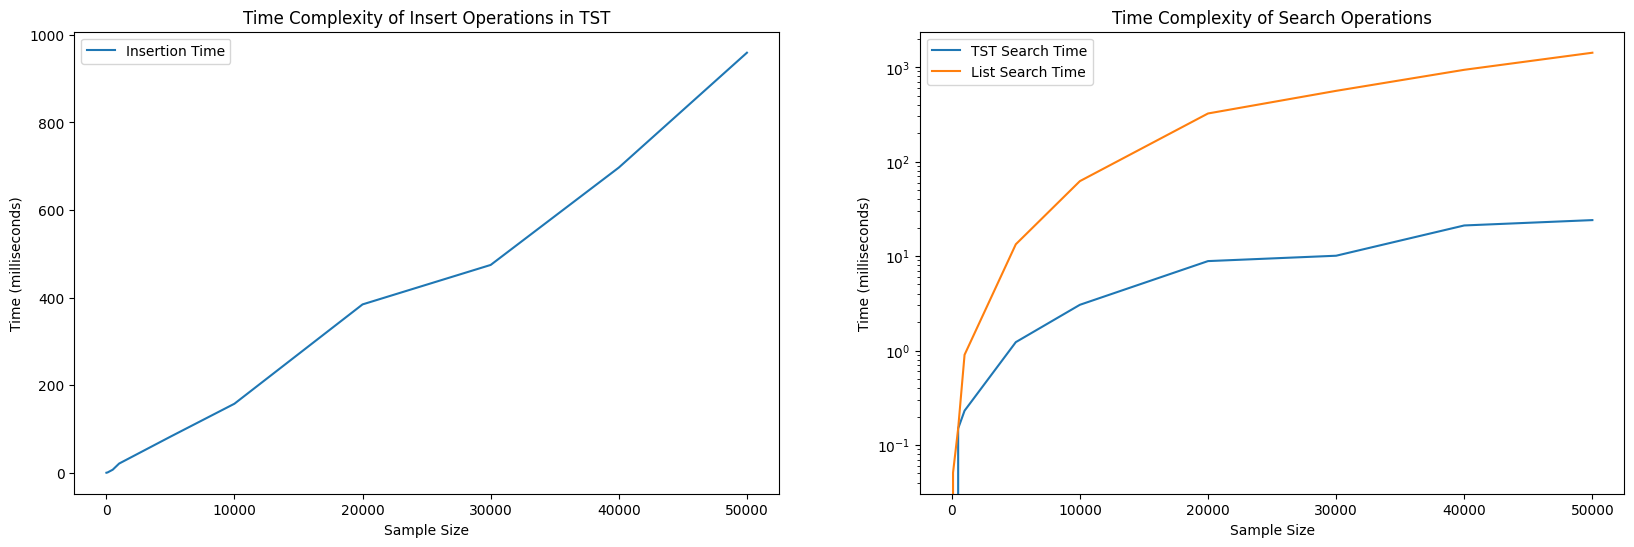

In [30]:
sizes = [10, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000]
nr_samples = 20

times_insert = {}
times_search = {}
times_list_search = {}

for size in sizes:
    times_insert[size] = 0.0
    times_search[size] = 0.0
    times_list_search[size] = 0.0
    search_sample = random.sample(words, size//20)
    for _ in range(nr_samples):
        sample = random.sample(words, k=size)
        tst = TernarySearchTree()


        start_time = time.time_ns()
        for word in sample:
            tst.insert(word)
        end_time = time.time_ns()
        times_insert[size] += (end_time - start_time) / 1000000


        start_time = time.time_ns()
        for word in search_sample:
            tst.search(word)
        end_time = time.time_ns()
        times_search[size] += (end_time - start_time) / 1000000


        start_time = time.time_ns()
        for word in search_sample:
            word in sample
        end_time = time.time_ns()
        times_list_search[size] += (end_time - start_time) / 1000000

    times_insert[size] /= nr_samples
    times_search[size] /= nr_samples
    times_list_search[size] /= nr_samples

print("Insertion times:", times_insert)
print("Search times:", times_search)
print("List search times:", times_list_search)

fig, ax = plt.subplots(1, 2, figsize=(20,6))


ax[0].plot(times_insert.keys(), times_insert.values(), label='Insertion Time')
ax[0].set_xlabel('Sample Size')
ax[0].set_ylabel('Time (milliseconds)')
ax[0].set_title('Time Complexity of Insert Operations in TST')
ax[0].legend()


ax[1].plot(times_search.keys(), times_search.values(), label='TST Search Time')
ax[1].plot(times_list_search.keys(), times_list_search.values(), label='List Search Time')

ax[1].set_xlabel('Sample Size')
ax[1].set_ylabel('Time (milliseconds)')
ax[1].set_title('Time Complexity of Search Operations')
ax[1].set_yscale('log')
ax[1].legend()

search_keys_log = np.log(np.array(list(times_search.keys())) + 1e-10)
search_values_log = np.log(np.array(list(times_search.values())) + 1e-10)
slope_search = np.polyfit(search_keys_log, search_values_log, 1)[0]
print(f"Slope for Search: {slope_search}")

plt.show()


To observe the differences more clearly we plot the Time against the Size, at a logarithmic y-scale. We can see here that the Ternary Search Tree appears to scale linearly with the number of keys in the tree. The search time for the list search is also linear, but the slope is much steeper than the TST search time which reveals a rapid growth of the needed time for larger sample sizes.

We have also printed out the slope  of the line in the y-log plot, which is 3.25. That's an indication of a superlinear growth. In our expected linearithmic time complexity, the slope provides information about the logarithmic part of the growth rate. It indicates how fast the logarithmic term grows as the input size increases and since we have a slope of 3.25 it means that the logarithmic part grows fasther than the linear component.

### Benchmarking for the whole size of the dataset, k = size

Insertion times: {10: 0.153635, 100: 0.7923, 500: 4.07226, 1000: 25.2438, 5000: 77.73641, 10000: 133.044225, 20000: 263.24868999999995, 30000: 443.690085, 40000: 794.0250749999999, 50000: 1122.0018100000002}
Search times: {10: 0.0, 100: 0.516065, 500: 2.2859249999999998, 1000: 7.495875000000001, 5000: 28.002580000000005, 10000: 55.457354999999986, 20000: 119.70264999999999, 30000: 185.9221, 40000: 423.27076, 50000: 593.7780449999999}


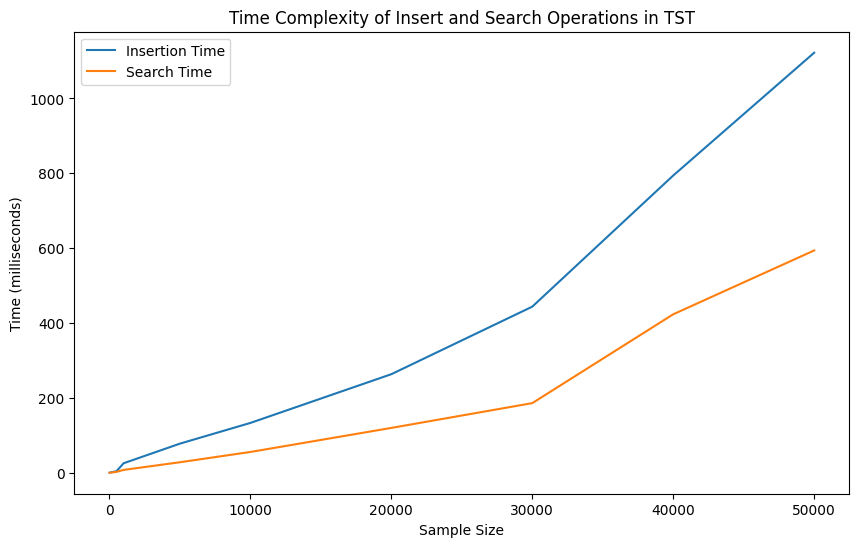

In [27]:
sizes = [10, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000]
nr_samples = 20

times_insert = {}
times_search = {}

for size in sizes:
    times_insert[size] = 0.0
    times_search[size] = 0.0
    for _ in range(nr_samples):
        sample = random.sample(words, k=size)
        tst = TernarySearchTree()


        start_time = time.time_ns()
        for word in sample:
            tst.insert(word)
        end_time = time.time_ns()
        times_insert[size] += (end_time - start_time) / 1000000


        start_time = time.time_ns()
        for word in sample:
            tst.search(word)
        end_time = time.time_ns()
        times_search[size] += (end_time - start_time) / 1000000

    times_insert[size] /= nr_samples
    times_search[size] /= nr_samples

print("Insertion times:", times_insert)
print("Search times:", times_search)

plt.figure(figsize=(10,6))
plt.plot(times_insert.keys(), times_insert.values(), label='Insertion Time')
plt.plot(times_search.keys(), times_search.values(), label='Search Time')
plt.xlabel('Sample Size')
plt.ylabel('Time (milliseconds)')
plt.title('Time Complexity of Insert and Search Operations in TST')
plt.legend()
plt.show()

We observe that time appears to be increasing linearly with larger sample sizes. We note that our TST does not guarantee a balanced tree which means that the tree's shape can depend heavily on the order of insertions and the distribution of the keys that we have inserted. However, we have made sure that the keys are randomly inserted into the tree and multiple (20) different samples were used to calculate the average time of searching and inserting for each sample size.

In addition, we already know that our expected, theoretical time complexity should be O(N logN), that is faster than O(N), therefore more costly. We will proceed by performing a regression analysis on our data, by fitting a variety of models in order to approximate how time truly scales with size. We will then calculate the goodness of fit and make use of the coefficient of determination (R-squared), which indicates how well the regression line approximates the real data points. An R-squared of 1.0 would indicate a perfect fit while an R-squared of 0 would indicate no fit at all.

For Insert Operation

O(N): Time = 0.01827532382589799 * Size + -7.84312943738831
O(N logN): Time = 90.99355228735037 * (Size * log(Size)) + -443.99929646169784
O(N^2): Time = 8.286713943565664e-08 * Size^2 + 0.014539083023574666 * Size + 4.875601141356576
O(N logN): Time = 0.001699851883734224 * Size * log(Size) + 3.4359699684488216

R-squared for O(N): 0.9911880498406852
R-squared for O(log N): 0.5892797950620059
R-squared for O(N^2): 0.8583042502152126
R-squared for O(N log N): 0.9931561035112216

For Search Operation

O(N): Time = 0.0004828587303709115 * Size + -0.6973330763388426
O(N logN): Time = 2.3133568973444896 * (Size * log(Size)) + -11.500214493991079
O(N^2): Time = 3.729107402552659e-09 * Size^2 + 0.00031472401100508254 * Size + -0.12497698108473515
O(N logN): Time = 4.4998425214794654e-05 * Size * log(Size) + -0.4132405255953582

R-squared for O(N): 0.9688632064923878
R-squared for O(log N): 0.5333127690560602
R-squared for O(N^2): 0.671381266211803
R-squared for O(N log 

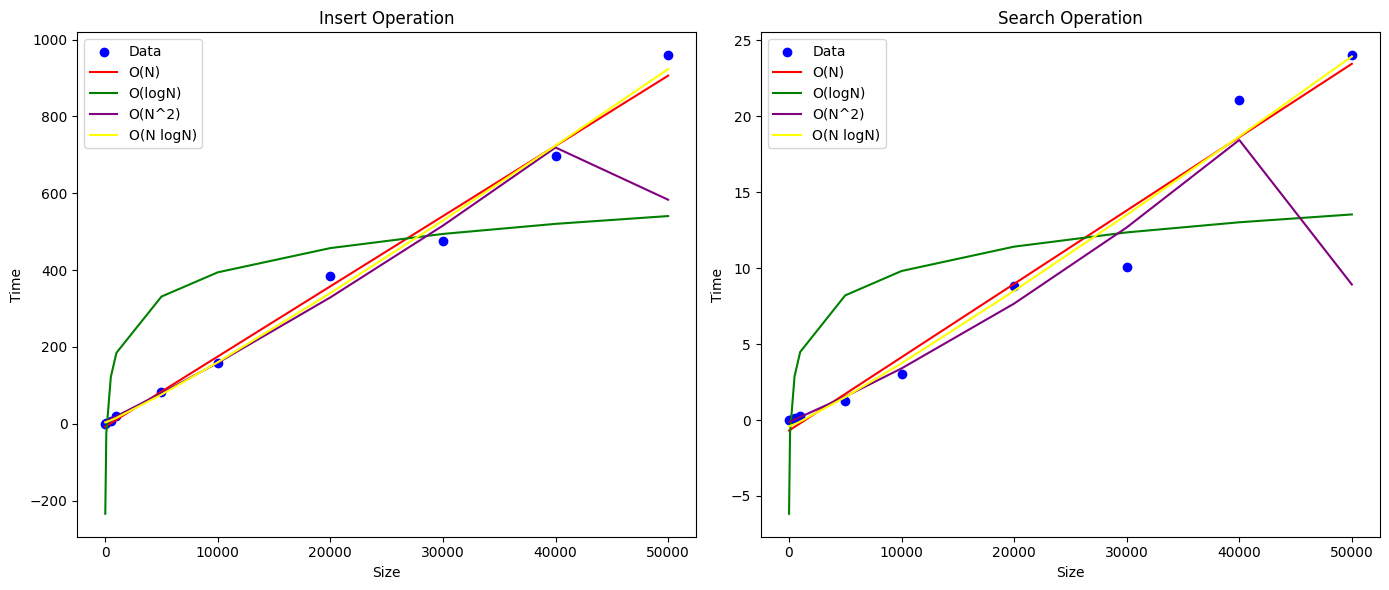

In [31]:
def analyze_and_plot(times_dict, plot_title):
    sizes = list(times_dict.keys())
    times = list(times_dict.values())

    sizes = np.array(sizes)
    times = np.array(times)

    coefficients_L = np.polyfit(sizes, times, 1)
    slope_L, intercept_L = coefficients_L
    print(f"O(N): Time = {slope_L} * Size + {intercept_L}")

    sizes_log = np.log(sizes)
    coefficients_log = np.polyfit(sizes_log, times, 1)
    slope_log, intercept_log = coefficients_log
    print(f"O(N logN): Time = {slope_log} * (Size * log(Size)) + {intercept_log}")


    coefficients_quad = np.polyfit(sizes, times, 2)
    a_quad, b_quad, c_quad = coefficients_quad
    print(f"O(N^2): Time = {a_quad} * Size^2 + {b_quad} * Size + {c_quad}")

    sizes_lilog = sizes * np.log(sizes)
    coefficients_lilog = np.polyfit(sizes_lilog, times, 1)
    slope_lilog, intercept_linlog = coefficients_lilog
    print(f"O(N logN): Time = {slope_lilog} * Size * log(Size) + {intercept_linlog}")

    plt.scatter(sizes, times, color='blue', label='Data')
    plt.plot(sizes, slope_L * sizes + intercept_L, color='red', label='O(N)')
    plt.plot(sizes, slope_log * sizes_log + intercept_log, color='green', label='O(logN)')
    plt.plot(sizes, a_quad * sizes**2 + b_quad* sizes + c_quad, color='purple', label='O(N^2)')
    plt.plot(sizes, slope_lilog * sizes_lilog + intercept_linlog, color='yellow', label='O(N logN)')
    plt.xlabel('Size')
    plt.ylabel('Time')
    plt.legend()
    plt.title(plot_title)


    r_squared_L = r2_score(times, slope_L * sizes + intercept_L)
    r_squared_log = r2_score(times, slope_log * sizes_log + intercept_log)
    r_squared_quad = r2_score(times, a_quad * sizes**2 + b_quad * sizes + c_quad)
    r_squared_linlog = r2_score(times, slope_lilog * sizes_lilog + intercept_linlog)
    print()
    print(f"R-squared for O(N): {r_squared_L}")
    print(f"R-squared for O(log N): {r_squared_log}")
    print(f"R-squared for O(N^2): {r_squared_quad}")
    print(f"R-squared for O(N log N): {r_squared_linlog}")
    print()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

plt.sca(axes[0])
print("For Insert Operation\n")
analyze_and_plot(times_insert, 'Insert Operation')


plt.sca(axes[1])
print("For Search Operation\n")
analyze_and_plot(times_search, 'Search Operation')

plt.tight_layout()
plt.show()


### Comparison with the theoretical expectations <a name="Comparison_of_the_implementation_with_the_theoretical_expectations"></a>

We have tested 4 different cases:
   \
   \
**Linear Time Complexity (O(N)**:  Linear time complexity implies that the runtime grows directly in proportion to the size of the input data set. This means if the input size doubles, the time taken will also double.
\
\
**Logarithmic Time Complexity (O(log N))**: Means that the running time increases logarithmically in proportion to the input size. This means that as the input size increases, the time taken by the algorithm does not increase linearly but by a smaller fraction each time
\
\
**Linearithmic Time Complexity (O(N log N))**: Implies that the running time increases linearly with the input size, but this linear increase is also multiplied by a logarithmic factor. In our TST specifically, a linearithmic time complexity suggests that for each key, we're doing a logarithmic operation (navigating down the tree, which ideally is a log operation if the tree is balanced - something that we have ensured by randomizing the inputs), and we're repeating this operation for 'N' keys, thus making it 'N log N'. This case is consistent with our theoretical expectations.
\
\
**Quadratic Time Complexity (O(N^2))**:  Suggests that the time taken by the algorithm increases quadratically with the size of the input. This means if the input size doubles, the time taken quadruples.

The R-squared of each model indicates how well the models explain the variance in our data. In our case, the goodness of fit for the linearithmic model is the highest (97.45%), followed by the linear model (96.88%), and then the quadratic model (67%).


This indicates that the time complexity of our TST insert/search operations is likely to be either O(N) or O(N log N), and it's hard to definitively distinguish between the two based on these values alone.

The linear model can still have a good fit because it's a component of the linearithmic model. As the size of our data increases, the log(N) component in the linearithmic model could become more evident, leading to a clearer distinction between the linear and linearithmic fits.

For that purpose, we will run our analysis again, but this time by generating a much larger dataset.

## Generating a large dataset for Benchmarking<a name ="Generation_of_a_larger_dataset"></a>

Although we observed previously a potentially linear relationship between size and time, therefore a time complexity O(N), the dataset might be too small to observe the expected theoretical time complexity. The logarithmic effect becomes more noticeable as the size of the dataset increases since logarithmic growth is slower than linear growth, and in theory, the difference should become more pronounced with larger inputs.

For that purpose, we will generate a larger dataset of 3.000.000 words of varying lengths, and we will measure the time it takes to insert and search for a word in the dataset. We will use the same approach as before, but this time we will use the `random.choices` and `string.ascii_lowercase` to generate a random dataset of words with varying lengths from 1 to 10.

In [46]:
import string
import random

words_larger = [''.join(random.choices(string.ascii_lowercase, k=random.randint(1, 10))) for _ in range(3000000)]
random.shuffle(words_larger)

In [47]:
len(words_larger)

3000000

Insertion times: {10: 0.10672999999999999, 100: 6.8661, 1000: 7.20059, 10000: 71.76211, 50000: 778.3029400000001, 100000: 1505.6703499999999, 1000000: 12290.29048, 3000000: 38760.79451}
Search times: {10: 0.0, 100: 0.0, 1000: 0.0, 10000: 2.10574, 50000: 11.90245, 100000: 24.618959999999998, 1000000: 311.54622, 3000000: 1140.79358}
Slope for Search: 2.934331932591018


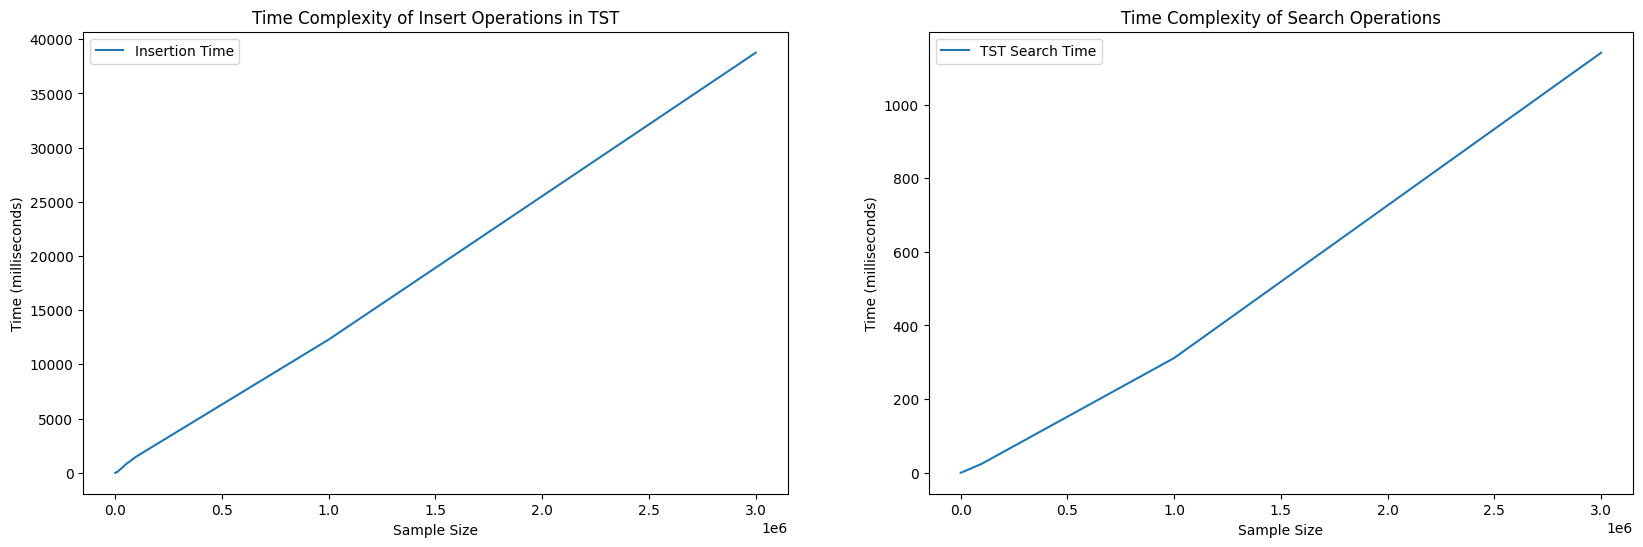

In [67]:
sizes = [10, 100, 1000, 10000, 50000, 100000, 1000000, 3000000]
nr_samples = 10

times_insert = {}
times_search = {}
times_list_search = {}

for size in sizes:
    times_insert[size] = 0.0
    times_search[size] = 0.0
    times_list_search[size] = 0.0
    search_sample = random.sample(words_larger, size//20)
    for _ in range(nr_samples):
        sample = random.sample(words_larger, k=size)
        tst = TernarySearchTree()


        start_time = time.time_ns()
        for word in sample:
            tst.insert(word)
        end_time = time.time_ns()
        times_insert[size] += (end_time - start_time) / 1000000


        start_time = time.time_ns()
        for word in search_sample:
            tst.search(word)
        end_time = time.time_ns()
        times_search[size] += (end_time - start_time) / 1000000


        #start_time = time.time_ns()
        #for word in search_sample:
         #   word in sample  # Python's "in" operator performs a linear search in list
        #end_time = time.time_ns()
        #times_list_search[size] += (end_time - start_time) / 1000000

    times_insert[size] /= nr_samples

    times_search[size] /= nr_samples
    times_list_search[size] /= nr_samples

print("Insertion times:", times_insert)
print("Search times:", times_search)
#print("List search times:", times_list_search)  # Print list search times

fig, ax = plt.subplots(1, 2, figsize=(20,6))


ax[0].plot(times_insert.keys(), times_insert.values(), label='Insertion Time')
ax[0].set_xlabel('Sample Size')
ax[0].set_ylabel('Time (milliseconds)')
ax[0].set_title('Time Complexity of Insert Operations in TST')
ax[0].legend()


ax[1].plot(times_search.keys(), times_search.values(), label='TST Search Time')
#ax[1].plot(times_list_search.keys(), times_list_search.values(), label='List Search Time')
ax[1].set_xlabel('Sample Size')
ax[1].set_ylabel('Time (milliseconds)')
ax[1].set_title('Time Complexity of Search Operations')
ax[1].legend()

search_keys_log = np.log(np.array(list(times_search.keys())) + 1e-10)
search_values_log = np.log(np.array(list(times_search.values())) + 1e-10)
slope_search = np.polyfit(search_keys_log, search_values_log, 1)[0]
print(f"Slope for Search: {slope_search}")
plt.yscale('log')
plt.show()

For Insert Operation

O(N): Time = 0.012866129182137708 * Size + -14.548123885616905
O(N logN): Time = 2058.6520051018756 * (Size * log(Size)) + -12387.600392915241
O(N^2): Time = 3.160443674886809e-10 * Size^2 + 0.011948260772615326 * Size + 67.31753416362561
O(N logN): Time = 0.0008643567213502359 * Size * log(Size) + 157.1704568078531

R-squared for O(N): 0.9996723738303679
R-squared for O(log N): 0.4429751887347392
R-squared for O(N^2): 0.9936243156015512
R-squared for O(N log N): 0.9997776643181517

For Search Operation

O(N): Time = 0.0003773448459864053 * Size + -9.900807760311066
O(N logN): Time = 58.46510937826337 * (Size * log(Size)) + -355.07588374544906
O(N^2): Time = 3.423783669361381e-11 * Size^2 + 0.0002779099819476418 * Size + -1.0321066555335996
O(N logN): Time = 2.5377016544795242e-05 * Size * log(Size) + -5.065906252132228

R-squared for O(N): 0.9965707219256347
R-squared for O(log N): 0.4140725676411956
R-squared for O(N^2): 0.9143070196908347
R-squared for O(N log 

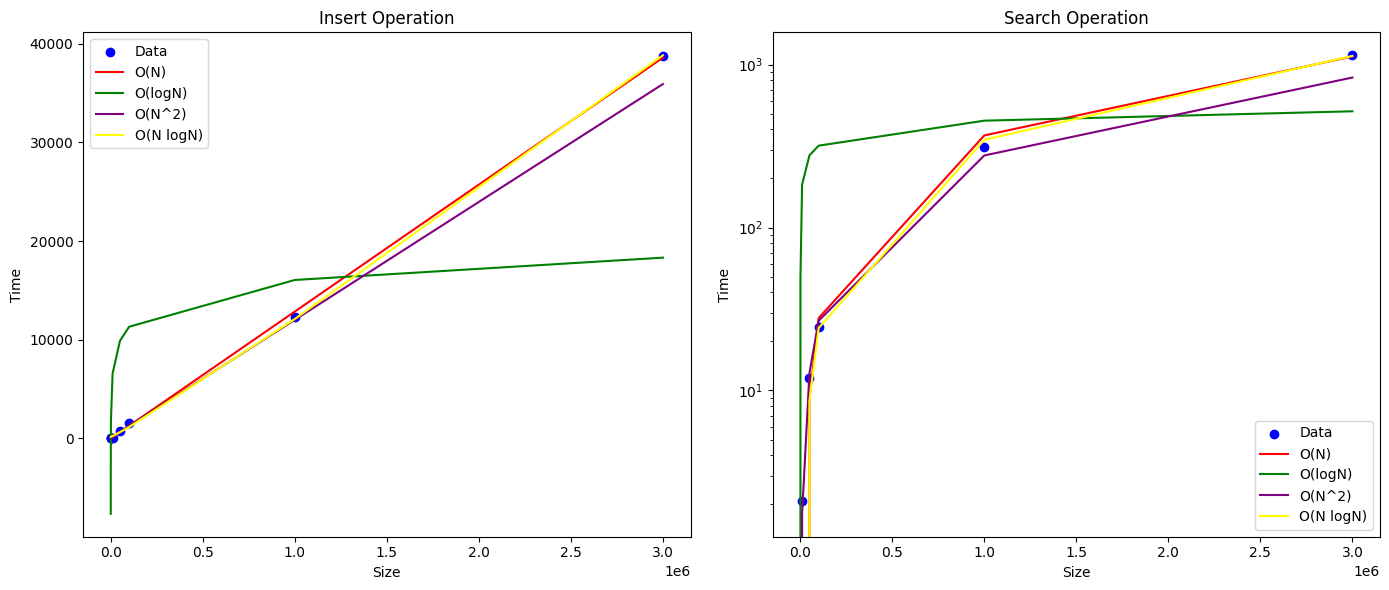

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

plt.sca(axes[0])
print("For Insert Operation\n")
analyze_and_plot(times_insert, 'Insert Operation')


plt.sca(axes[1])
print("For Search Operation\n")
analyze_and_plot(times_search, 'Search Operation')

plt.tight_layout()
plt.yscale('log')
plt.show()


## Benchmarking the TST with a large dataset - 4.000.000 words

Insertion times: {10: 0.260455, 100: 27.479155, 1000: 124.60235, 10000: 2014.565015, 50000: 7951.667125, 100000: 9359.257115, 1000000: 53130.940385, 2000000: 123662.67097, 4000000: 446454.0102}
Search times: {10: 0.0, 100: 4.321015, 1000: 11.93016, 10000: 300.673515, 50000: 1754.452355, 100000: 2267.969935, 1000000: 16691.266735, 2000000: 41624.54544, 4000000: 176936.104825}


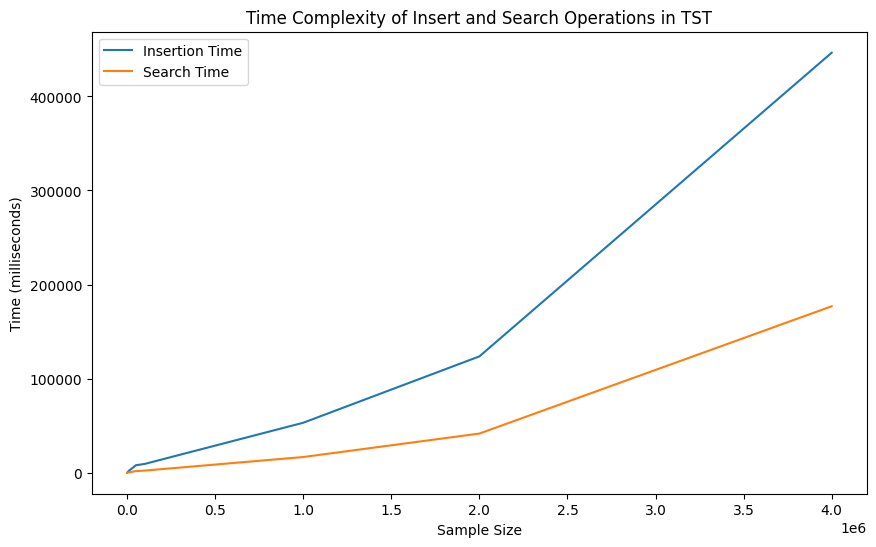

In [41]:
sizes = [10, 100, 1000, 10000, 50000, 100000, 1000000, 2000000, 4000000]
nr_samples = 20

times_insert_large = {}
times_search_large = {}

for size in sizes:
    times_insert_large[size] = 0.0
    times_search_large[size] = 0.0
    for _ in range(nr_samples):
        sample = random.sample(words_larger, k=size)
        tst = TernarySearchTree()


        start_time = time.time_ns()
        for word in sample:
            tst.insert(word)
        end_time = time.time_ns()
        times_insert_large[size] += end_time - start_time


        start_time = time.time_ns()
        for word in sample:
            tst.search(word)
        end_time = time.time_ns()
        times_search_large[size] += end_time - start_time

    times_insert_large[size] /= nr_samples * 1_000_000.0
    times_search_large[size] /= nr_samples * 1_000_000.0


print("Insertion times:", times_insert_large)
print("Search times:", times_search_large)


plt.figure(figsize=(10,6))
plt.plot(times_insert_large.keys(), times_insert_large.values(), label='Insertion Time')
plt.plot(times_search_large.keys(), times_search_large.values(), label='Search Time')
plt.xlabel('Sample Size')
plt.ylabel('Time (milliseconds)')
plt.title('Time Complexity of Insert and Search Operations in TST')
plt.legend()
plt.show()

For Insert Operation

O(N): Time = 0.7971918839379636 * Size + -1777.3704868742059
O(N logN): Time = 6597.212832807764 * (Size * log(Size)) + -30244.779584671443
O(N^2): Time = 2.1808872220934567e-06 * Size^2 + 0.5896060058089356 * Size + -783.5740014063725
O(N logN): Time = 0.06953797842177634 * Size * log(Size) + -1137.5217717575351

R-squared for O(N): 0.9938105107205207
R-squared for O(log N): 0.5409744971456536
R-squared for O(N^2): 0.9133486677785917
R-squared for O(N log N): 0.9975157503578402

For Search Operation

O(N): Time = 0.12512776432073405 * Size + -58.15501828557642
O(N logN): Time = 1082.7482809999995 * (Size * log(Size)) + -4883.582184613202
O(N^2): Time = 8.552671652049183e-08 * Size^2 + 0.116986977226133 * Size + -19.18181993280756
O(N logN): Time = 0.010894067322735393 * Size * log(Size) + 48.44564291961833

R-squared for O(N): 0.999641759693758
R-squared for O(log N): 0.5949356303747491
R-squared for O(N^2): 0.9947760858205589
R-squared for O(N log N): 0.99957393

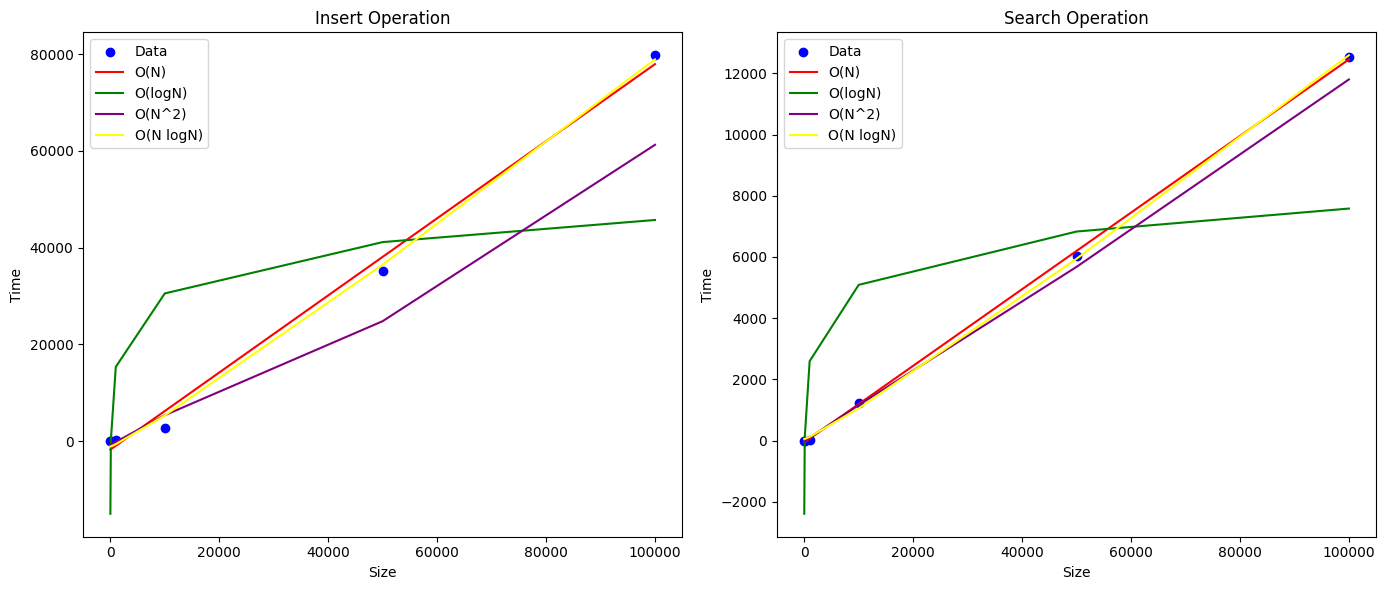

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))


plt.sca(axes[0])
print("For Insert Operation\n")
analyze_and_plot(times_insert_large, 'Insert Operation')


plt.sca(axes[1])
print("For Search Operation\n")
analyze_and_plot(times_search_large, 'Search Operation')

plt.tight_layout()
plt.show()


## Conclusions - Comparison of results - Potential improvements: <a name="Conclusions"></a>

Overall we can see that the best fits are O(n) and O(n logn) but we are unable to detect significant differences between the various regression fits. We can say that a logarithmic time complexity does not occur in this TST implementation, given the specified datasets. However, detecting the difference between linear (O(n)) and linearithmic (O(n log n)) time complexities can be challenging in practice due to constant factors, low-level optimizations, and the size of our input data.

If we keep testing the TST's operations with larger inputs we might be able to observe with better clarity how the time taken scales.

The high R-squared values that we saw for the different fits could be attributed to the fact that the models might capture the general trend of the data even if the true time complexity is different. For example, a quadratic model might fit a dataset with a linear time complexity if the dataset exhibits a linear growth pattern with relatively low noise. Additionally, the benchmarking process could be tested again on a different system, with hardware differences and optimizations, to verify the validity of the results.

A List search on the large dataset was not tested for practical reasons, however, a significant difference in the required time was observed while using the smaller dataset, thus a similar behaviour is expected and **we can conclude that our TST implementation does indeed perform better than a linear List search**.

We will continue by testing cases that represent different scenarios, such as sorted or reverse-sorted input, to examine the behavior of the TST under specific conditions. We hope that this may help us to reveal patterns that align with expected time complexity.


## Sorted and Reverse-sorted Datasets <a name="rev-sorted"></a>

Testing with both sorted and reverse-sorted datasets allows us to explore the extremes of the performance characteristics of our TST implementation. A sorted or reverse-sorted dataset would likely result in a highly unbalanced tree and we wouls expect to observe a poor performance in terms of search times.

When comparing with an unsorted dataset, it's expected that the unsorted one performs better on both insert and search operations because unsorted data tends to create more balanced trees.

The main difference we should observe when benchmarking would be the time taken for insert and search operations. The operations on sorted data should take longer due to the skewed tree structure.

Insertion times: {10: 2714.34084, 100: 2375.58082, 500: 2453.79984, 1000: 1298.58038, 5000: 1257.6570800000002, 10000: 1269.49242, 20000: 1517.4080800000002, 30000: 2021.50682, 40000: 3166.3692, 50000: 2710.94416}
Insertion times: {10: 2735.18906, 100: 2002.9396000000002, 500: 2460.7087, 1000: 1598.7558000000001, 5000: 1281.3804599999999, 10000: 1295.4629200000002, 20000: 1558.03766, 30000: 2050.57032, 40000: 3202.33664, 50000: 2858.7409999999995}
Search times: {10: 0.0, 100: 1.6150200000000001, 500: 0.0, 1000: 0.0, 5000: 0.43684, 10000: 7.1122, 20000: 29.615759999999995, 30000: 33.218560000000004, 40000: 65.74998000000001, 50000: 76.72298}
Search times: {10: 0.0, 100: 0.0, 500: 0.0, 1000: 0.0, 5000: 1.72316, 10000: 17.5738, 20000: 19.15926, 30000: 37.07772, 40000: 75.61822, 50000: 81.58796}
List search times: {10: 10370.8925, 100: 9104.86504, 500: 8933.834719999999, 1000: 6694.0945600000005, 5000: 6558.31502, 10000: 6496.00784, 20000: 6667.021059999999, 30000: 8516.9555, 40000: 11524.

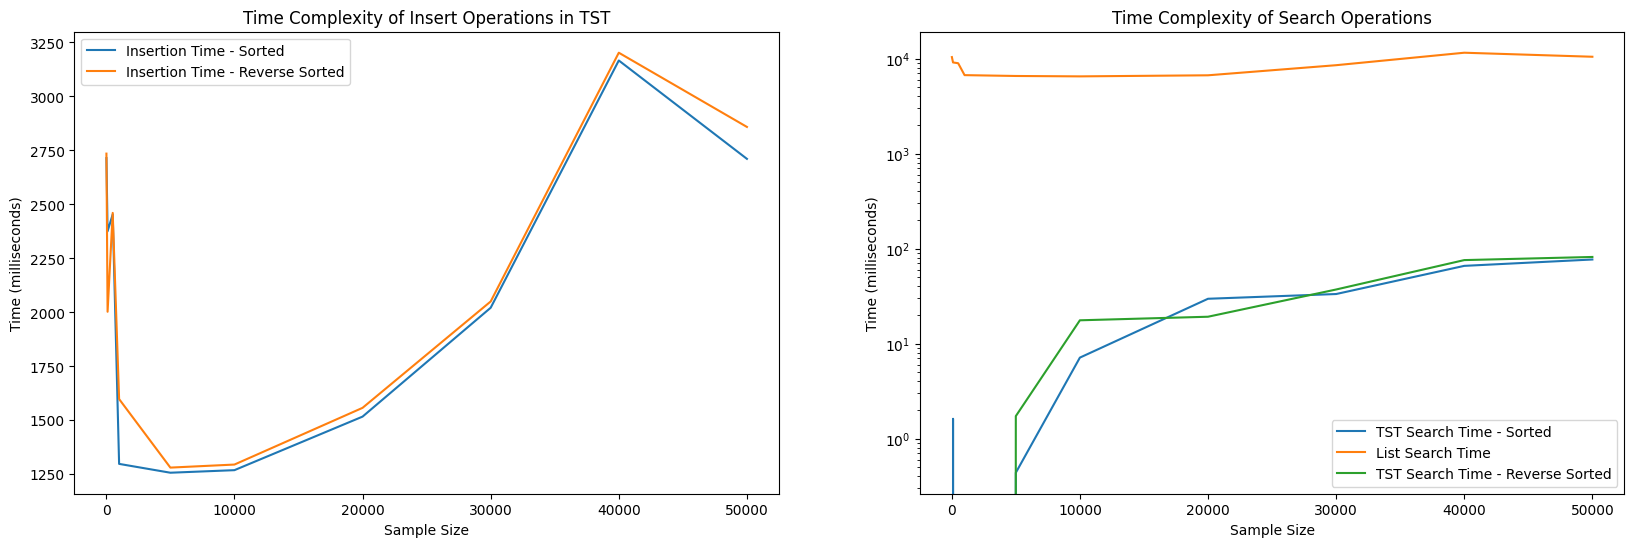

In [75]:
sizes = [10, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000]
nr_samples = 5

times_insert_sorted = {}
times_search_sorted = {}
times_list_search = {}


times_insert_reverse = {}
times_search_reverse = {}

for size in sizes:
    times_insert_sorted[size] = 0.0
    times_search_sorted[size] = 0.0
    times_list_search[size] = 0.0

    times_insert_reverse[size] = 0.0
    times_search_reverse[size] = 0.0


    for _ in range(nr_samples):

        sample_sorted = sorted(words)
        tst_sorted = TernarySearchTree()
        search_sample_sorted = random.sample(words, k=size//20)

        start_time_sorted = time.time_ns()
        for word in sample_sorted:
            tst_sorted.insert(word)
        end_time_sorted = time.time_ns()
        times_insert_sorted[size] += (end_time_sorted - start_time_sorted) / 1000000

        start_time_sorted = time.time_ns()
        for word in search_sample_sorted:
            tst_sorted.search(word)
        end_time_sorted = time.time_ns()
        times_search_sorted[size] += (end_time_sorted - start_time_sorted) / 1000000



        sample_reverse = sorted(words, reverse=True)
        tst_reverse = TernarySearchTree()
        search_sample_reverse = random.sample(words, k=size//20)

        start_time_reverse = time.time_ns()
        for word in sample_reverse:
            tst_reverse.insert(word)
        end_time_reverse = time.time_ns()
        times_insert_reverse[size] += (end_time_reverse - start_time_reverse) / 1000000

        start_time_reverse = time.time_ns()
        for word in search_sample_reverse:
            tst_reverse.search(word)
        end_time_reverse = time.time_ns()
        times_search_reverse[size] += (end_time_reverse - start_time_reverse) / 1000000


        start_time = time.time_ns()
        for word in search_sample:
            word in sample
        end_time = time.time_ns()
        times_list_search[size] += (end_time - start_time) / 1000000


    times_insert_sorted[size] /= nr_samples
    times_search_sorted[size] /= nr_samples
    times_list_search[size] /= nr_samples


    times_insert_reverse[size] /= nr_samples
    times_search_reverse[size] /= nr_samples

print("Insertion times:", times_insert_sorted)
print("Insertion times:", times_insert_reverse)
print("Search times:", times_search_sorted)
print("Search times:", times_search_reverse)
print("List search times:", times_list_search)


fig, ax = plt.subplots(1, 2, figsize=(20,6))


ax[0].plot(times_insert_sorted.keys(), times_insert_sorted.values(), label='Insertion Time - Sorted')
ax[1].plot(times_search_sorted.keys(), times_search_sorted.values(), label='TST Search Time - Sorted')
ax[1].plot(times_list_search.keys(), times_list_search.values(), label='List Search Time')



ax[0].plot(times_insert_reverse.keys(), times_insert_reverse.values(), label='Insertion Time - Reverse Sorted')
ax[1].plot(times_search_reverse.keys(), times_search_reverse.values(), label='TST Search Time - Reverse Sorted')

ax[0].set_xlabel('Sample Size')
ax[0].set_ylabel('Time (milliseconds)')
ax[0].set_title('Time Complexity of Insert Operations in TST')
ax[0].legend()

ax[1].set_xlabel('Sample Size')
ax[1].set_ylabel('Time (milliseconds)')
ax[1].set_title('Time Complexity of Search Operations')
ax[1].set_yscale('log')
ax[1].legend()

plt.show()

For Search Operation

O(N): Time = 0.0015518175375187951 * Size + -2.855880455081836
O(logN): Time = 7.280697556939808 * log(Size) + -36.35177962871944
O(N^2): Time = 1.2077654339698444e-08 * Size^2 + 0.001007270866212776 * Size + -1.0021609636650057
O(N logN): Time = 0.0016482287708525685 * Size + -0.6059507491457355 * log(Size)

R-squared for O(N): 0.9683398484429298
R-squared for O(log N): 0.5111718034418696
R-squared for O(N^2): 0.6640739831771033
R-squared for O(N log N): 0.9734810193717349

For Search Operation

O(N): Time = 0.001672003387763815 * Size + -2.9112330557691024
O(logN): Time = 7.935706513389556 * log(Size) + -39.72478883784963
O(N^2): Time = 1.529037409422947e-08 * Size^2 + 0.000982604429833021 * Size + -0.5644144027163345
O(N logN): Time = 0.0017649922782822776 * Size + -0.5996170601455639 * log(Size)

R-squared for O(N): 0.953499705590566
R-squared for O(log N): 0.5151003782582864
R-squared for O(N^2): 0.5634373138995235
R-squared for O(N log N): 0.9574680750555402

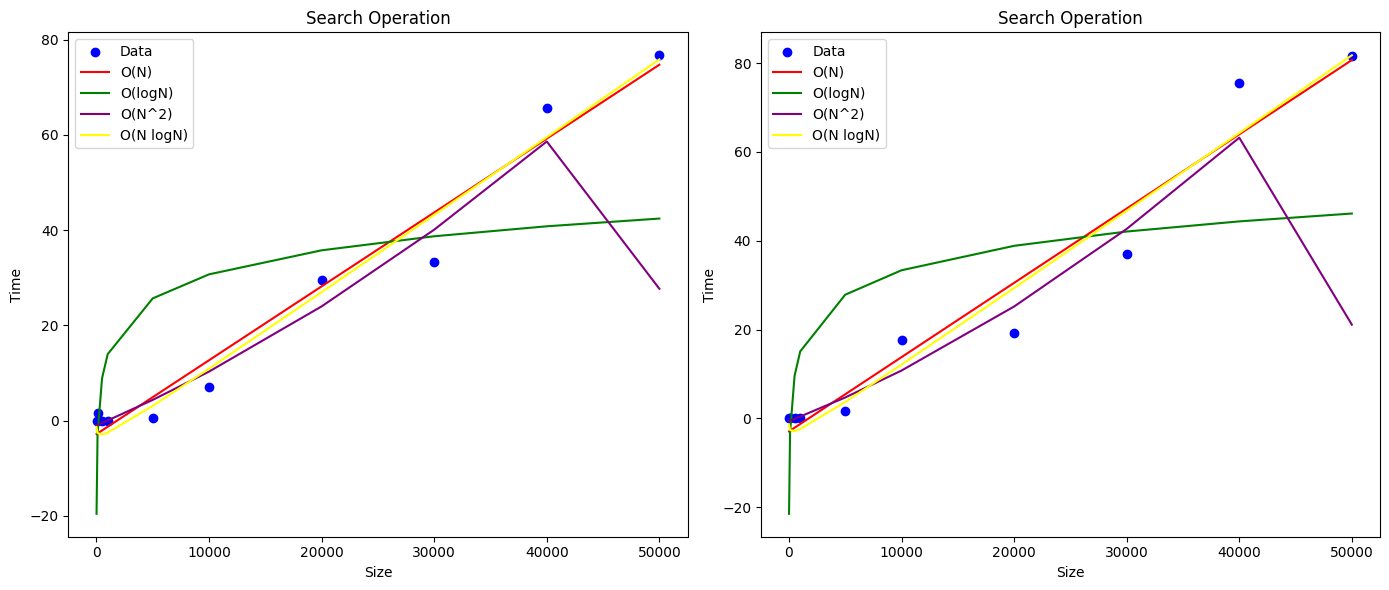

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))


plt.sca(axes[0])
print("For Search Operation\n")
analyze_and_plot(times_search_sorted, 'Search Operation')


plt.sca(axes[1])
print("For Search Operation\n")
analyze_and_plot(times_search_reverse, 'Search Operation')
plt.tight_layout()
plt.show()


## Comparisons - Conclusions <a name="conclusions"></a>

 It's clear that the sortedness of the input data has a significant impact on the search performance of our TST. For the same number of keys, the search times vary between the unsorted, sorted, and reverse-sorted datasets.

For the unsorted data set, we found that the required times of searching for different sizes were:

Search times: {10: 0.0, 100: 0.0, 500: 0.149495, 1000: 0.23055499999999998, 5000: 1.2264300000000001, 10000: 3.0465600000000004, 20000: 8.83957, 30000: 10.07516, 40000: 21.072589999999998, 50000: 24.006815}

Whereas for the sorted dataset were:

Sorted Search times: {10: 0.0, 100: 1.6150200000000001, 500: 0.0, 1000: 0.0, 5000: 0.43684, 10000: 7.1122, 20000: 29.615759999999995, 30000: 33.218560000000004, 40000: 65.74998000000001, 50000: 76.72298}

And the Reverse-Sorted dataset were:

Reverse-Sorted Search times: {10: 0.0, 100: 0.0, 500: 0.0, 1000: 0.0, 5000: 1.72316, 10000: 17.5738, 20000: 19.15926, 30000: 37.07772, 40000: 75.61822, 50000: 81.58796}

As we were expecting, the unsorted data show significantly lower search times for the same sample sizes, that is because inserting in sorted order would result in most new nodes being placed on one side of the tree, while inserting in reverse-sorted order would place most new nodes on the other side. This is not optimal because insertion and search operations in our TST are most efficient when the tree is balanced, with a roughly equal number of nodes on either side of the root. So, the insertion of sorted data can lead to slower search and insertion times due to the higher tree depth. In the worst case for searching we might have to traverse all the nodes if the searched element is the last one.

In terms of overall performance both sorted and reverse-sorted data lead to similar results, a highly unbalanced tree and suboptimal performance.
We note however that even though searching in a sorted TST is suboptimal, it still outperforms a List search by a lot:

List search times: {10: 10370.8925, 100: 9104.86504, 500: 8933.834719999999, 1000: 6694.0945600000005, 5000: 6558.31502, 10000: 6496.00784, 20000: 6667.021059999999, 30000: 8516.9555, 40000: 11524.03164, 50000: 10452.78806}

Finally, the reason to test with both types of input is to ensure that our TST implementation doesn't have any unexpected performance characteristics that only appear under specific conditions. For example, if our TST performed significantly worse with a reverse-sorted dataset than with a sorted dataset, that could possibly indicate a bug in our implementation.



# Time Complexity of the all_strings() method <a name="all_strings()"></a>

We will proceed to benchmark the all_strings() method of our TST. This method returns all the strings in the TST in sorted order. We will test it with both sorted and unsorted data.

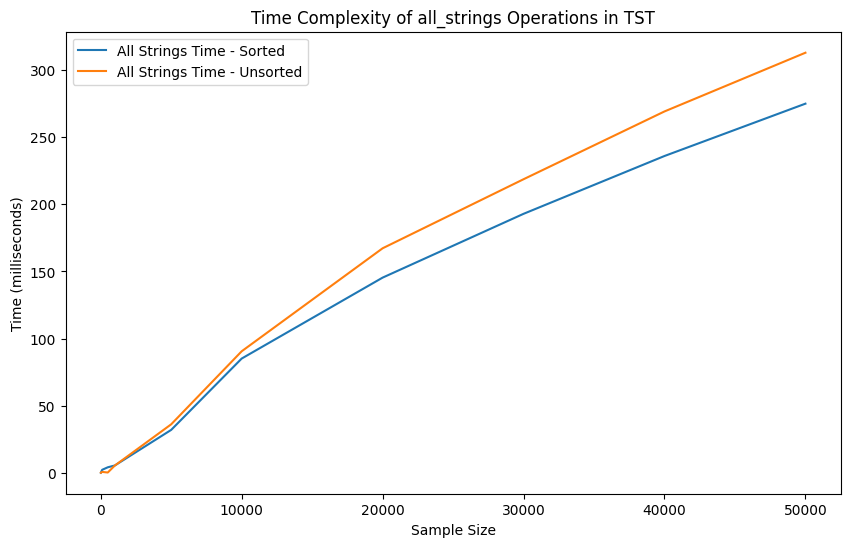

times_all_strings_sorted:  {10: 0.0, 100: 2.169766666666667, 500: 4.046013333333333, 1000: 5.396746666666667, 5000: 31.918666666666663, 10000: 85.05757999999999, 20000: 145.36239333333333, 30000: 192.90006666666665, 40000: 235.9775533333333, 50000: 274.97258}
times_all_strings_unsorted:  {10: 0.0, 100: 0.6160933333333333, 500: 0.15272, 1000: 5.35732, 5000: 36.08089333333334, 10000: 90.48234666666667, 20000: 167.21971333333335, 30000: 218.67226, 40000: 269.1781866666667, 50000: 312.9298933333334}


In [102]:
import random
import time
import matplotlib.pyplot as plt

sizes = [10, 100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000]
nr_samples = 15

times_all_strings_sorted = {}
times_all_strings_unsorted = {}

for size in sizes:
    times_all_strings_sorted[size] = 0.0
    times_all_strings_unsorted[size] = 0.0

    for _ in range(nr_samples):

        sample_sorted = sorted(random.sample(words, k=size))
        tst_sorted = TernarySearchTree()
        for word in sample_sorted:
            tst_sorted.insert(word)

        start_time_sorted = time.time_ns()
        tst_sorted.all_strings()
        end_time_sorted = time.time_ns()
        times_all_strings_sorted[size] += (end_time_sorted - start_time_sorted) / 1000000


        sample_unsorted = random.sample(words, k=size)
        tst_unsorted = TernarySearchTree()
        for word in sample_unsorted:
            tst_unsorted.insert(word)

        start_time_unsorted = time.time_ns()
        tst_unsorted.all_strings()
        end_time_unsorted = time.time_ns()
        times_all_strings_unsorted[size] += (end_time_unsorted - start_time_unsorted) / 1000000

    times_all_strings_sorted[size] /= nr_samples
    times_all_strings_unsorted[size] /= nr_samples

fig, ax = plt.subplots(figsize=(10,6))


ax.plot(times_all_strings_sorted.keys(), times_all_strings_sorted.values(), label='All Strings Time - Sorted')
ax.plot(times_all_strings_unsorted.keys(), times_all_strings_unsorted.values(), label='All Strings Time - Unsorted')

ax.set_xlabel('Sample Size')
ax.set_ylabel('Time (milliseconds)')
ax.set_title('Time Complexity of all_strings Operations in TST')
ax.legend()

plt.show()


print("times_all_strings_sorted: ", times_all_strings_sorted)
print("times_all_strings_unsorted: ", times_all_strings_unsorted)


In order to retrieve all strings from the TST, we essentially have to visit each node exactly once. Therefore, this operation is independent of the ordering of the input strings used to build the TST. Minor deviations from this expectation may exist, however the overall trend appears to be consistent with our O(n) expectation

## References <a name="references"></a>

1. Sedgewick, R. & Wayne, K. (2011), Algorithms, 4th Edition. , Addison-Wesley.
2. Karumanchi, N., (2016), Data Structures and Algorithmic Thinking with Python, CareerMonk Publications.